### Visualizing Model Outputs

In [1]:
import pandas as pd
import numpy as np
from numpy import inf
import os
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters

np.seterr(divide = 'ignore') 
pd.options.mode.chained_assignment = None
register_matplotlib_converters()
%matplotlib inline


In [2]:
all_data = pd.read_pickle('.\\..\\data\\covid_df.pkl')
output = pd.read_pickle('.\\..\\data\\predictions_log_total.pkl')
spain = pd.read_pickle('.\\..\\data\\predictions_log_spain.pkl')

In [3]:
def predicted_vs_real(full_df, output_df, country, target, logged=False):
    '''
    '''
    date = output_df.index.min()
    pre = full_df[(full_df['Country'] == country) & (full_df['Date'] <= date)][[target, 'Date']]
    real = country + ' real'
    predict = country + ' prediction'
    post = output_df[[real, predict]]  
    if logged:
        post = np.exp(post)
     
    fig, ax = plt.subplots(figsize=(12, 8))
    g = sns.lineplot(x=pre['Date'], y=pre[target], ax=ax)
    plt.title(label='Predicting: {} in {}'.format(target, country), fontsize=15)
    ax.axvline(x=date, ls=':', c='gray')
    g = sns.lineplot(x=post.index, y=post[real], ax=ax)
    g = sns.lineplot(x=post.index, y=post[predict], ax=ax)   
    plt.legend(('Trend', 'Prediction frontier', 'Real', 'Predicted'), prop={'size': 12})
    plt.ylabel(target)
    plt.show()


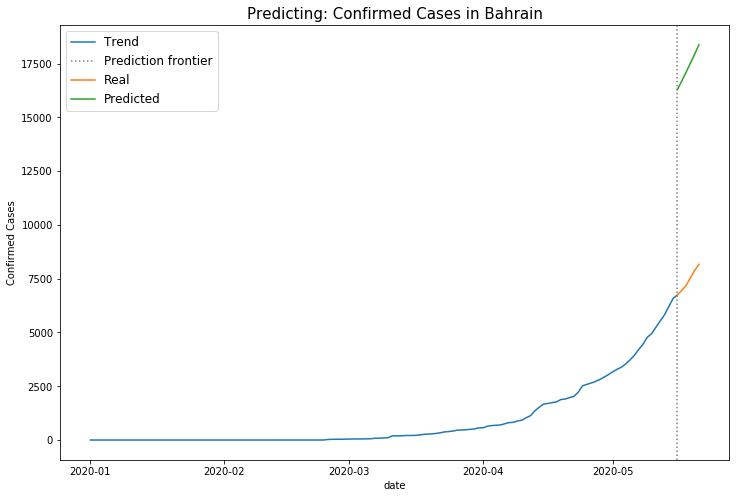

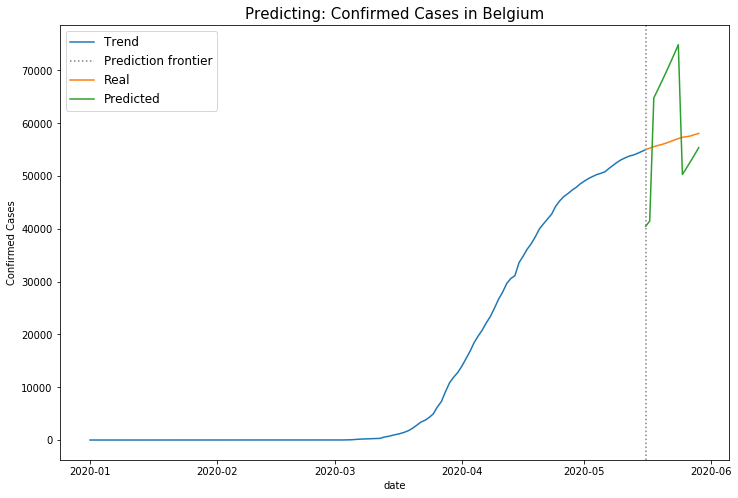

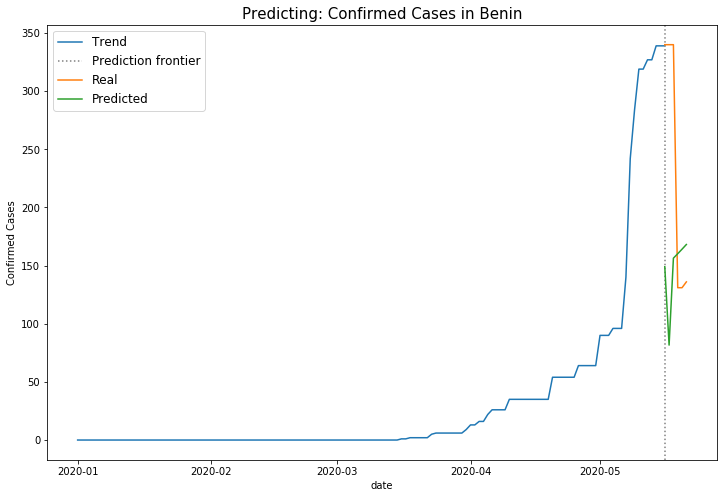

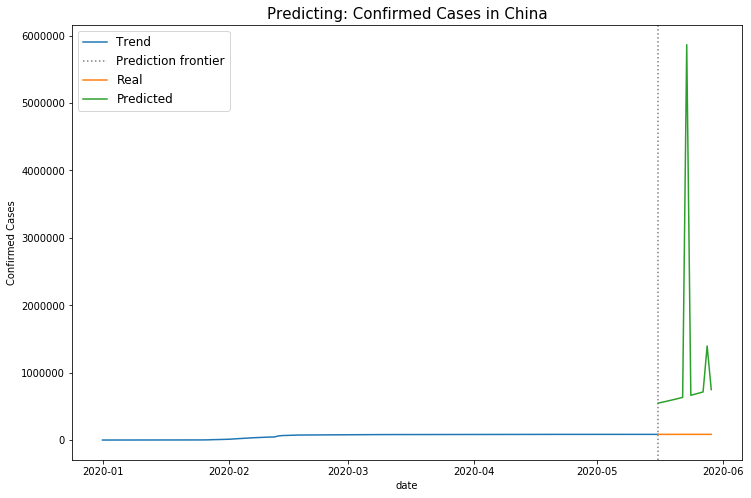

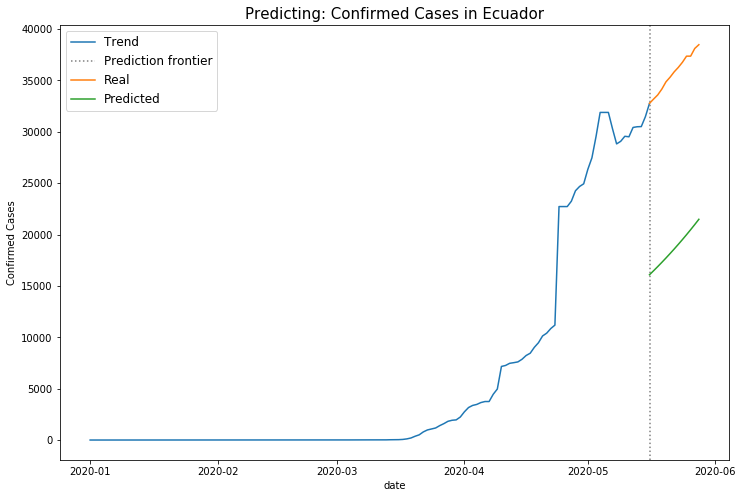

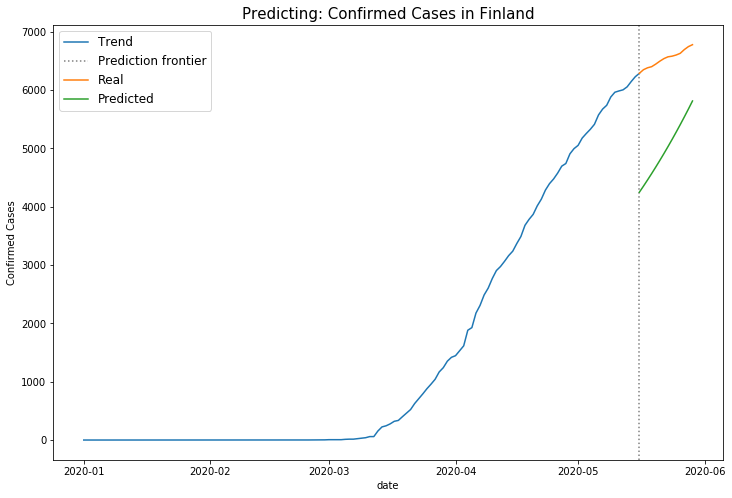

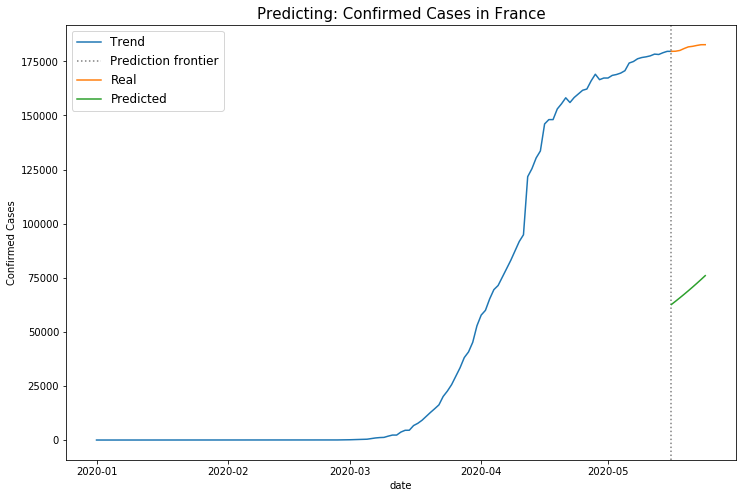

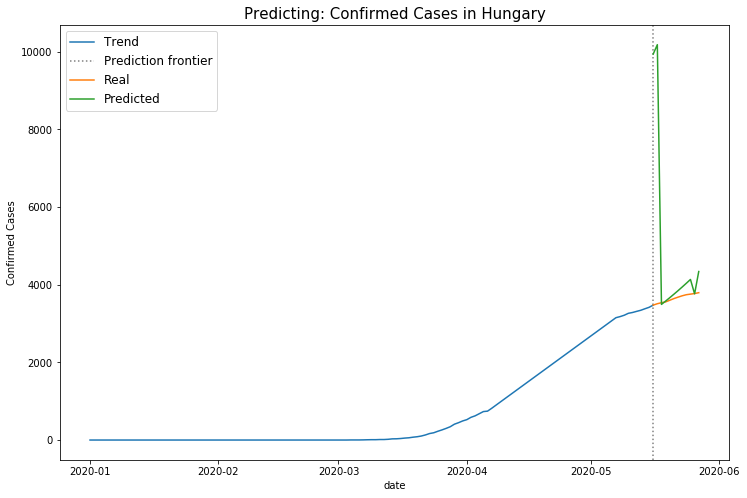

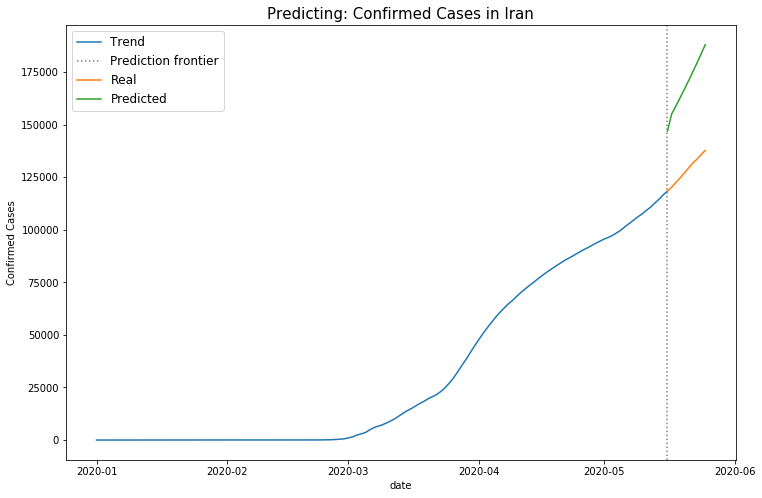

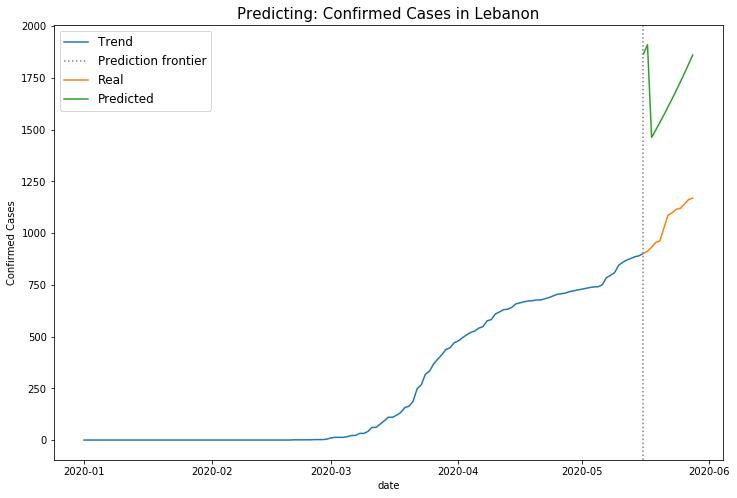

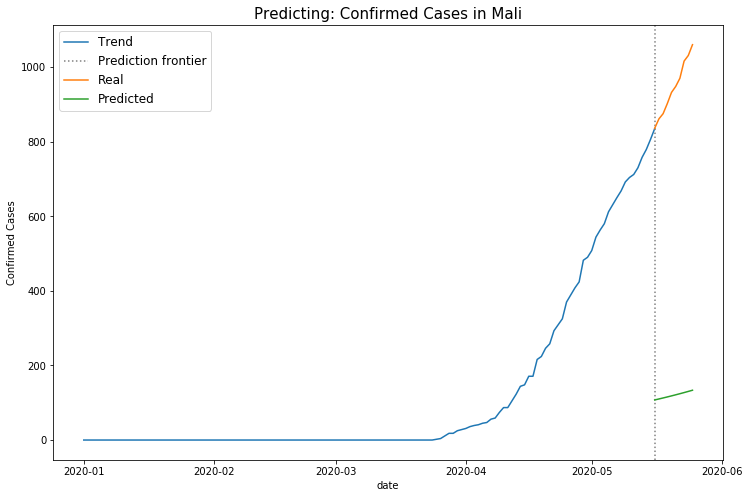

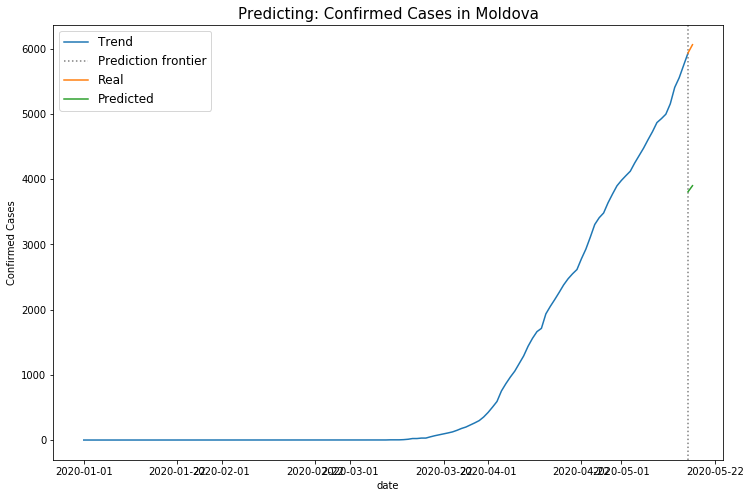

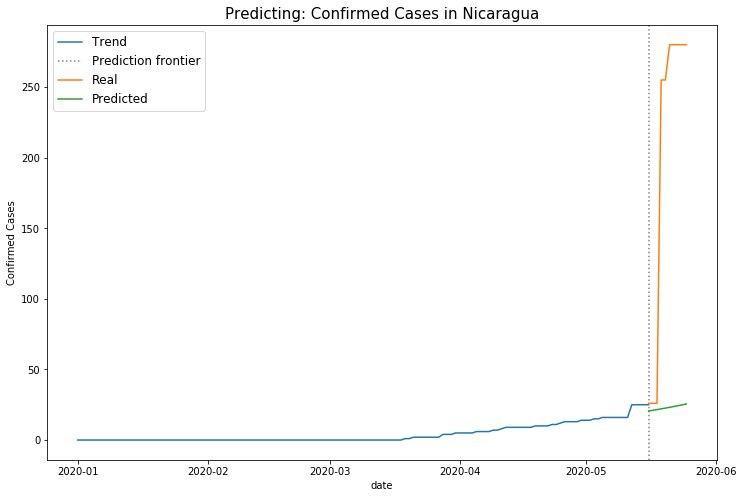

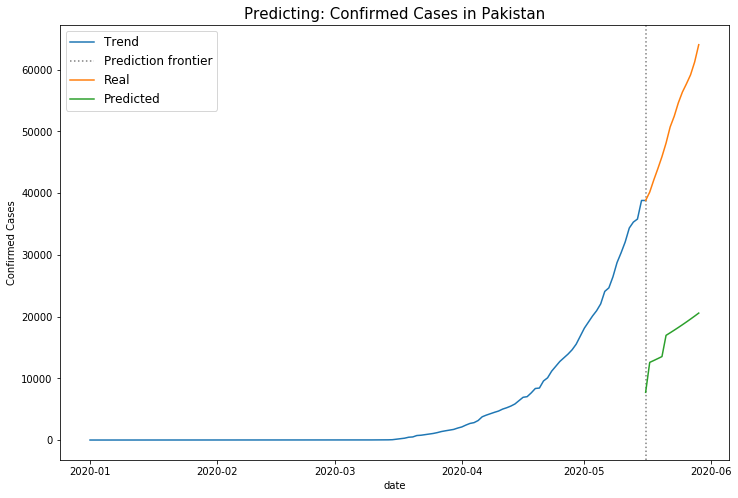

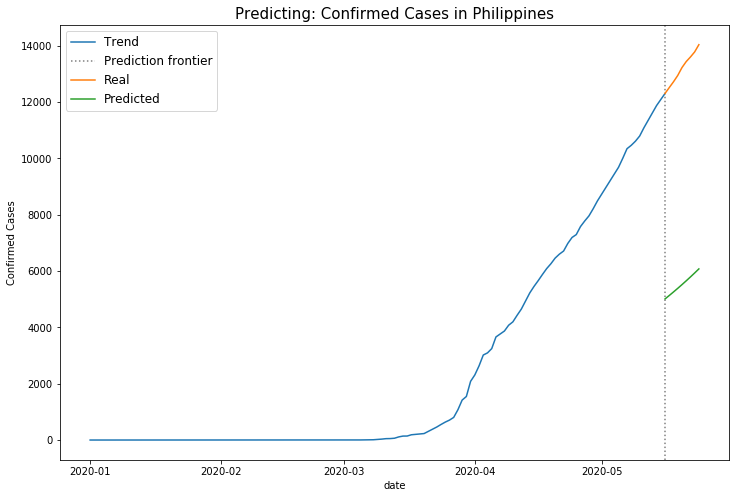

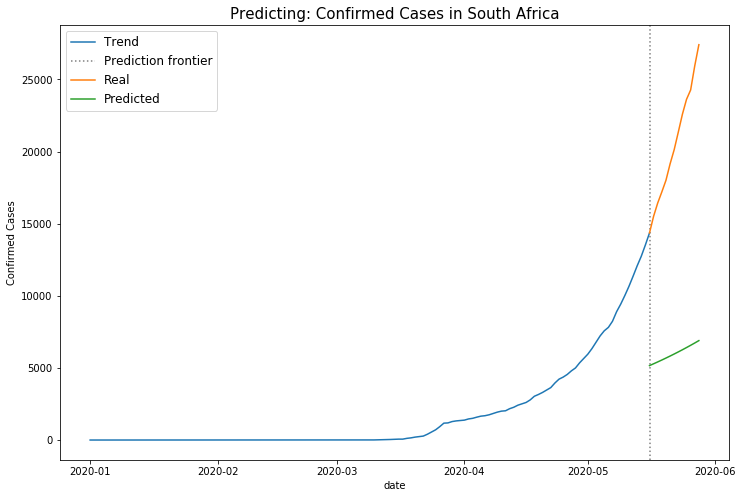

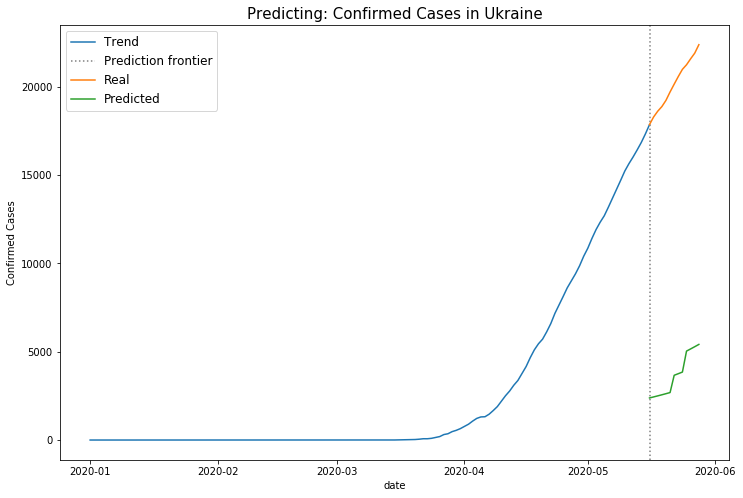

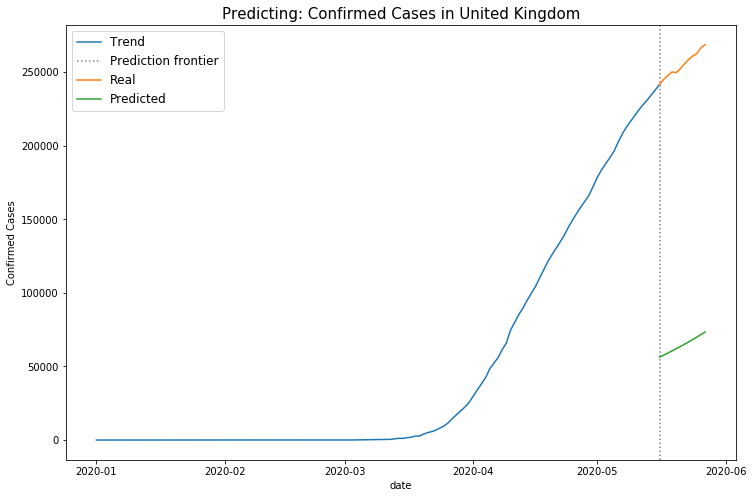

In [4]:
best_models = ['Bahrain', 'Belgium','Benin', 'China', 'Ecuador', 'Finland', 'France', 'Hungary', 'Iran', 'Lebanon', 'Mali', 'Moldova', 'Nicaragua', 'Pakistan', 'Philippines',\
               'South Africa', 'Ukraine', 'United Kingdom']
for country in best_models:
    predicted_vs_real(all_data, output, country, 'Confirmed Cases', logged=True)

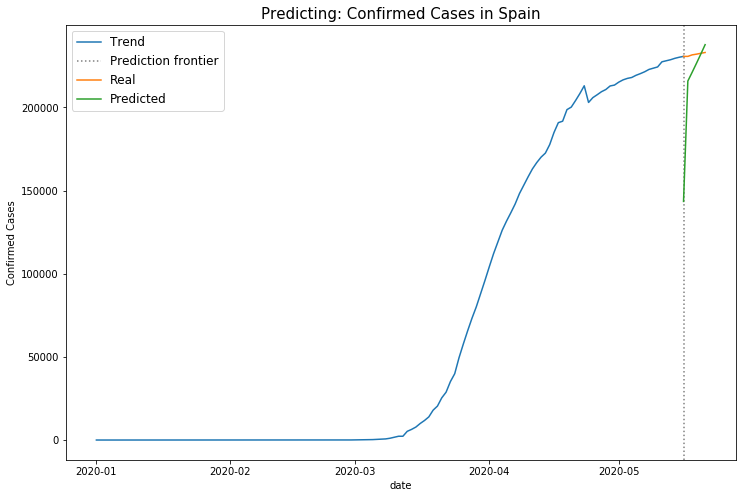

In [5]:
predicted_vs_real(all_data, output, 'Spain', 'Confirmed Cases', logged=True)